<a href="https://colab.research.google.com/github/ilanmoshe52/Final_Project/blob/main/denoising_and_CWT_of_ecg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
pip install wfdb


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.0/160.0 kB 3.0 MB/s eta 0:00:00


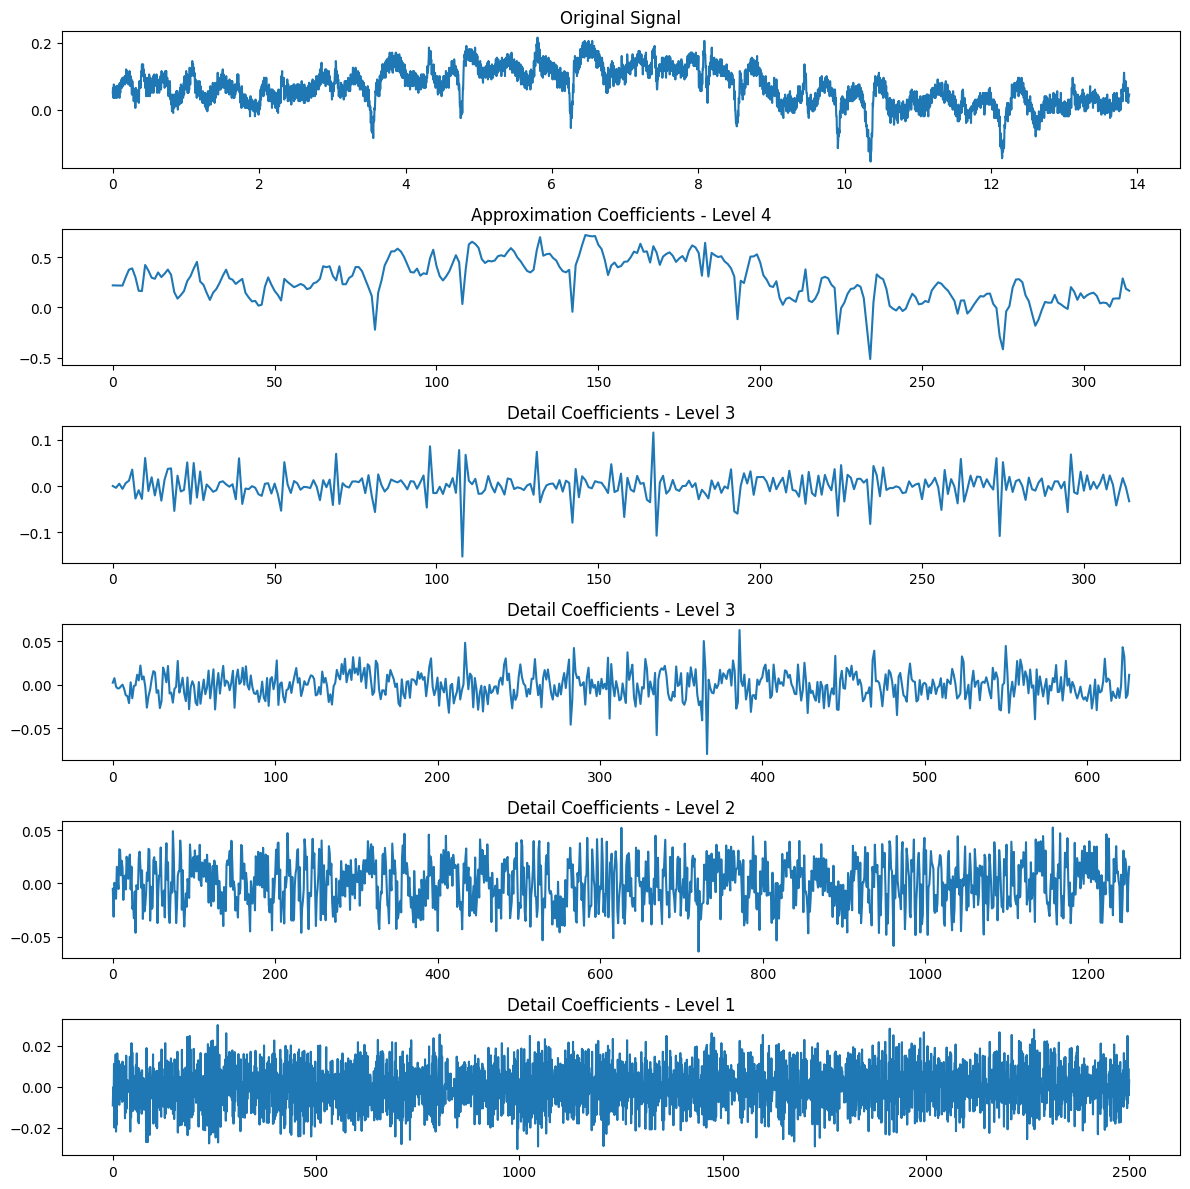

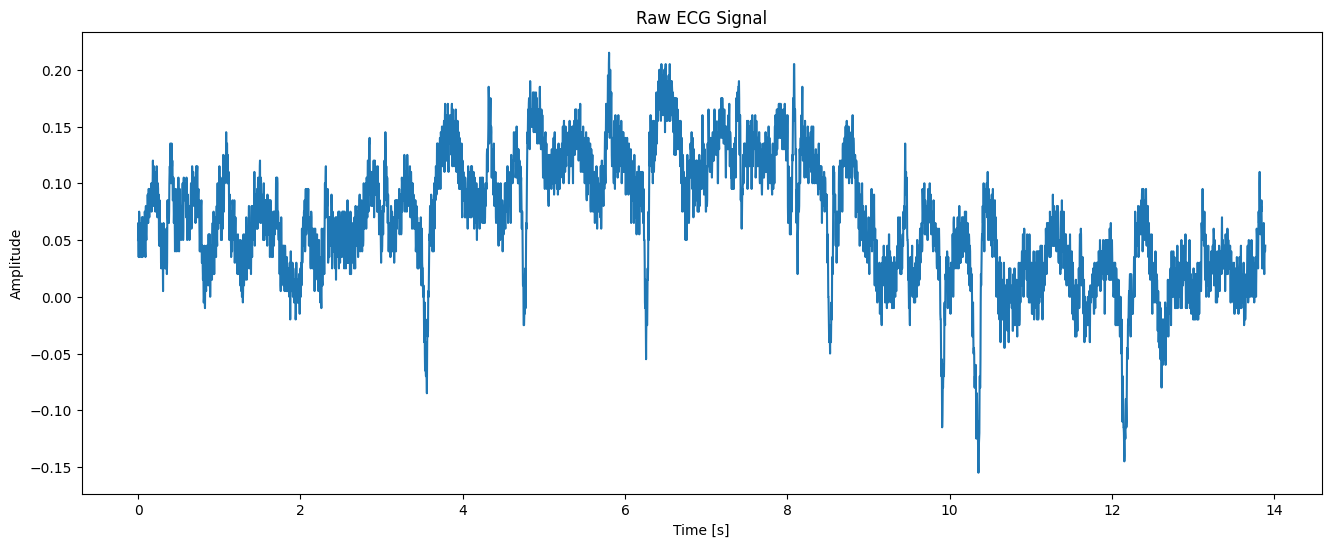

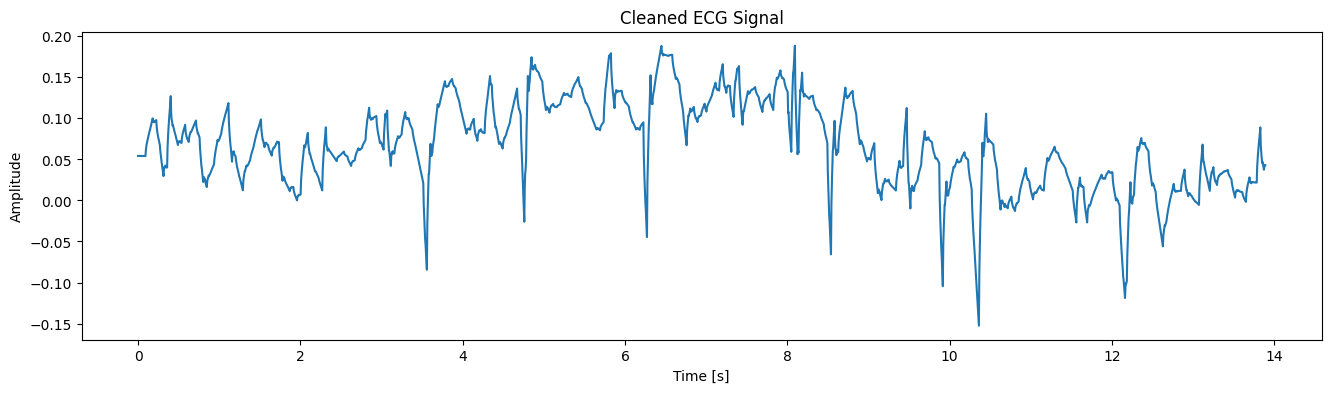

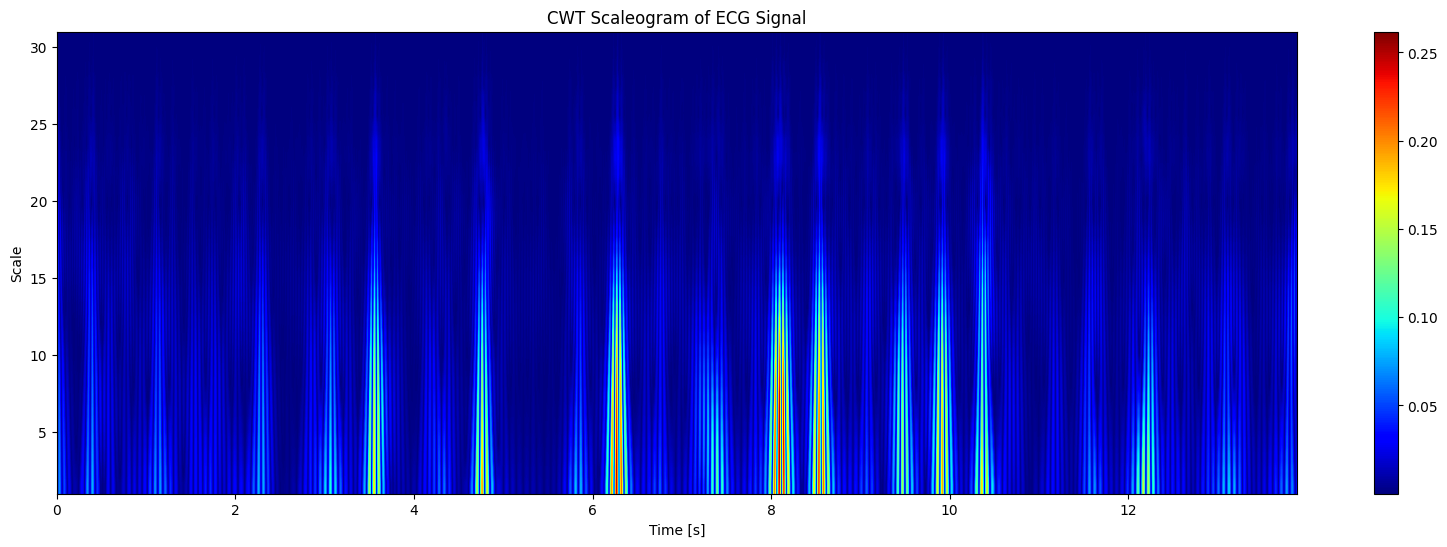

In [22]:
import wfdb
import numpy as np
import matplotlib.pyplot as plt
import pywt

# Load a sample ECG signal from the MIT-BIH Arrhythmia Database
record = wfdb.rdrecord('200', pn_dir='mitdb')
ecg = record.p_signal[:, 1]
sampling_rate = record.fs

l = 5000
ecg = ecg[l:2*l]
#ecg[500:510] = -1
# Generate time vector
t = np.linspace(0, len(ecg) / sampling_rate, len(ecg))

###############################

# Perform DWT
wavelet = 'db2'
coeffs = pywt.wavedec(ecg, wavelet, level=4)
cA4, cD4 ,cD3, cD2, cD1 = coeffs

###############################
#print



# Plot original signal and DWT coefficients
fig, ax = plt.subplots(6, 1, figsize=(12, 12))

ax[0].plot(t, ecg)
ax[0].set_title('Original Signal')
ax[1].plot(cA4)
ax[1].set_title('Approximation Coefficients - Level 4')
ax[2].plot(cD4)
ax[2].set_title('Detail Coefficients - Level 3')
ax[3].plot(cD3)
ax[3].set_title('Detail Coefficients - Level 3')
ax[4].plot(cD2)
ax[4].set_title('Detail Coefficients - Level 2')
ax[5].plot(cD1)
ax[5].set_title('Detail Coefficients - Level 1')
plt.tight_layout()
plt.show()



#########################################

# Thresholding (soft threshold)
threshold = np.sqrt(2 * np.log(len(ecg))) * np.median(np.abs(coeffs[-1])) / 0.6745
new_coeffs = list(coeffs)
for i in range(1, len(new_coeffs)):
    new_coeffs[i] = pywt.threshold(new_coeffs[i], threshold, mode='soft')

# Reconstruct the signal
ecg_denoised = pywt.waverec(new_coeffs, wavelet)

###############################
ecg_orig = ecg
ecg = ecg_denoised


# Plot raw ECG signal
plt.figure(figsize=(16, 6))
plt.plot(t, ecg_orig)
plt.title("Raw ECG Signal")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

# Plot raw ECG signal
plt.figure(figsize=(16, 4))
plt.plot(t, ecg)
plt.title("Cleaned ECG Signal")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()


# Apply CWT and generate scaleogram
def plot_cwt_scaleogram(signal, scales, waveletname='morl'):
    coef, freqs = pywt.cwt(signal, scales, waveletname, sampling_period=1/sampling_rate)
    plt.imshow(np.abs(coef), extent=[0, len(signal) / sampling_rate, 1, max(scales)], cmap='jet', aspect='auto')
    plt.colorbar()
    plt.ylabel('Scale')
    plt.xlabel('Time [s]')

# Define the scales for the CWT
scales = np.arange(1, 32)

# Plot the scaleogram
plt.figure(figsize=(20, 6))
plot_cwt_scaleogram(ecg, scales)
plt.title("CWT Scaleogram of ECG Signal")
plt.show()


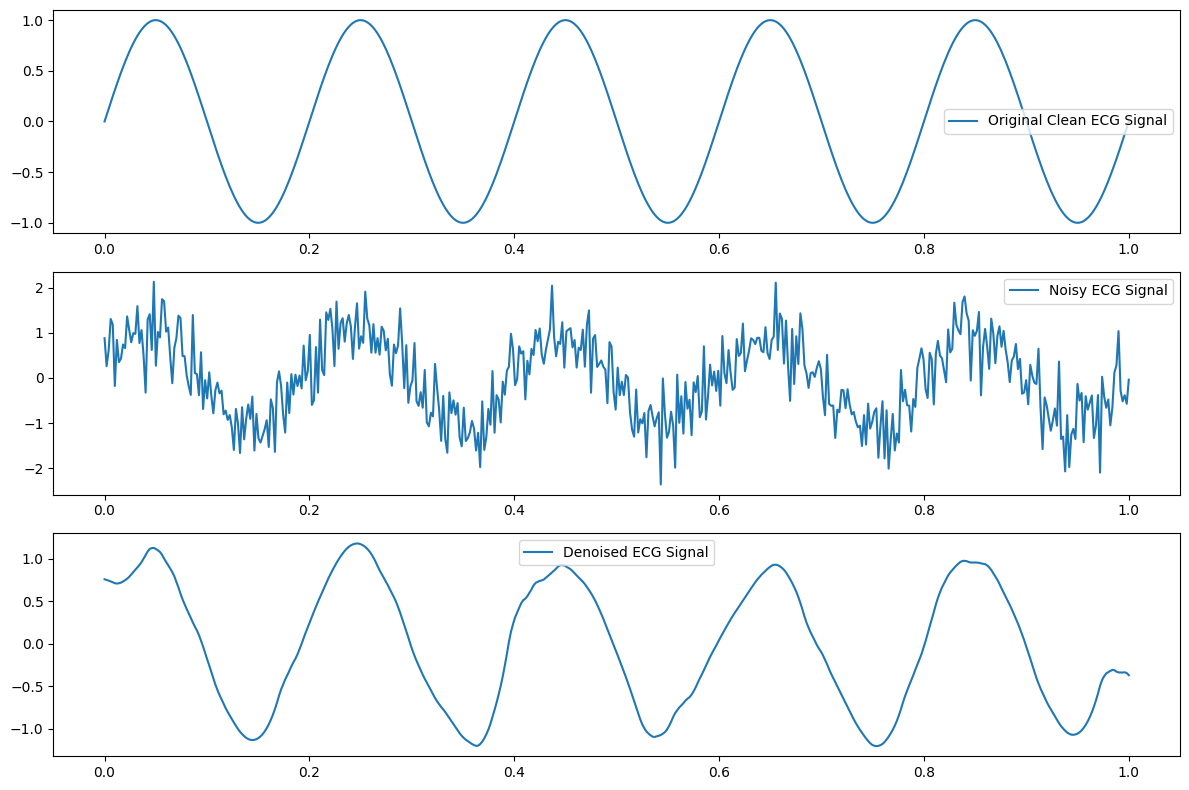

In [ ]:
import numpy as np
import pywt
import matplotlib.pyplot as plt

# Example ECG signal (You can replace this with your own ECG data)
# Simulating an ECG signal with noise
np.random.seed(0)
t = np.linspace(0, 1, 500)
ecg_clean = np.sin(2 * np.pi * 5 * t)  # Example clean ECG-like signal
noise = np.random.normal(0, 0.5, t.shape)
ecg_noisy = ecg_clean + noise

# Perform DWT
wavelet = 'db4'
coeffs = pywt.wavedec(ecg_noisy, wavelet, level=4)

# Thresholding (soft threshold)
threshold = np.sqrt(2 * np.log(len(ecg_noisy))) * np.median(np.abs(coeffs[-1])) / 0.6745
new_coeffs = list(coeffs)
for i in range(1, len(new_coeffs)):
    new_coeffs[i] = pywt.threshold(new_coeffs[i], threshold, mode='soft')

# Reconstruct the signal
ecg_denoised = pywt.waverec(new_coeffs, wavelet)

# Plot the results
plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
plt.plot(t, ecg_clean, label='Original Clean ECG Signal')
plt.legend()
plt.subplot(3, 1, 2)
plt.plot(t, ecg_noisy, label='Noisy ECG Signal')
plt.legend()
plt.subplot(3, 1, 3)
plt.plot(t, ecg_denoised, label='Denoised ECG Signal')
plt.legend()
plt.tight_layout()
plt.show()


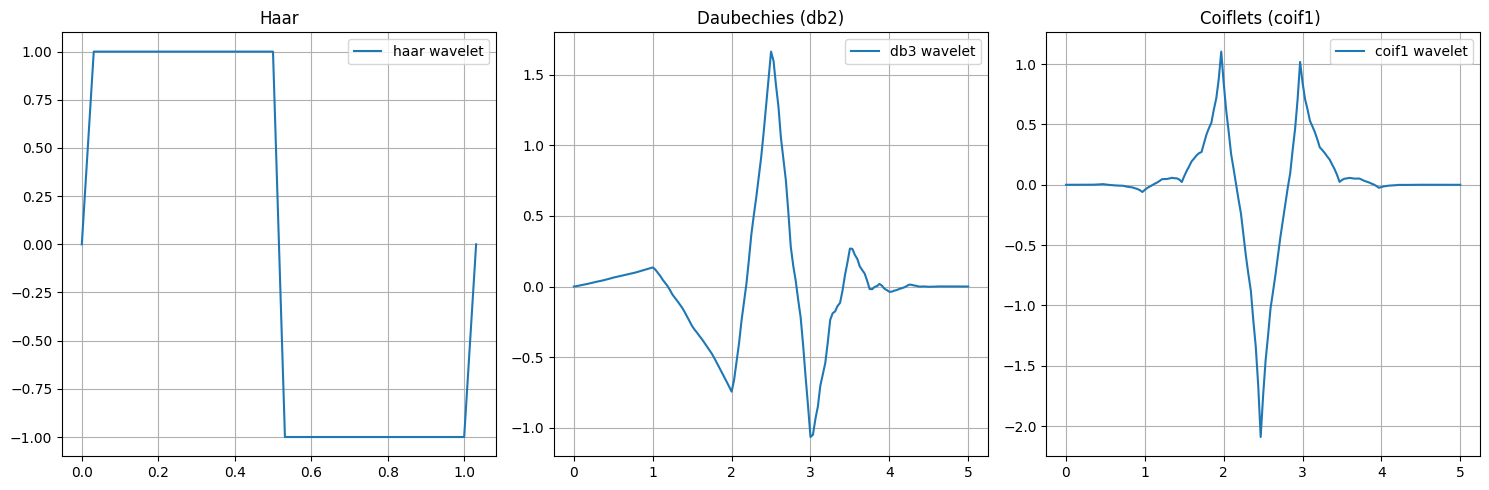

In [12]:
import pywt
import matplotlib.pyplot as plt
import numpy as np

# Define the wavelets to be plotted
wavelets = ['haar', 'db3', 'coif1']
wavelet_titles = ['Haar', 'Daubechies (db2)', 'Coiflets (coif1) ']

# Set up the plot
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, wavelet_name in enumerate(wavelets):
    # Create the wavelet
    wavelet = pywt.Wavelet(wavelet_name)

    # Get the wavelet function and the scaling function
    phi, psi, x = wavelet.wavefun(level=5)

    # Plot the wavelet function
    axes[i].plot(x, psi, label=f'{wavelet_name} wavelet')
    axes[i].set_title(wavelet_titles[i])
    axes[i].legend()
    axes[i].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()
